In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#To suppress all warnings
import warnings
warnings.filterwarnings('ignore')

In [121]:
df = sns.load_dataset('titanic')
# have a quick look
print(df.shape)
df.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [122]:
print(df.shape)
df.head(10)

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [124]:
df.describe(include=['object', 'category'])

,sex,embarked,class,who,deck,embark_town,alive
count,891,889,891,891,203,889,891
unique,2,3,3,3,7,3,2
top,male,S,Third,man,C,Southampton,no
freq,577,644,491,537,59,644,549


In [125]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [126]:
df.duplicated().sum()

np.int64(107)

In [127]:
df_clean = df.drop(columns=['deck'])

In [129]:
mode_embarked = df_clean['embarked'].mode()[0]
df_clean['embarked'].fillna(mode_embarked, inplace=True)

In [130]:
print(df_clean.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
embark_town      2
alive            0
alone            0
dtype: int64


In [131]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [154]:
df_clean[['embarked']].drop_duplicates()
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

#  Data Cleaning

In [133]:
mode_embarked = df_clean['embarked'].mode()[0]
df_clean['embarked'].fillna(mode_embarked, inplace=True)

In [134]:
cat_col = ['sex', 'class']
for col in cat_col:
    df_clean[col] = df_clean[col].astype('category')

In [135]:
df_clean['family_size']= df_clean['sibsp'] + df_clean['parch'] + 1

In [136]:
p = df_clean['fare'].quantile(0.99)
df_clean['fare_cap'] = df_clean['fare'].clip(upper=p)
   

# Visualization

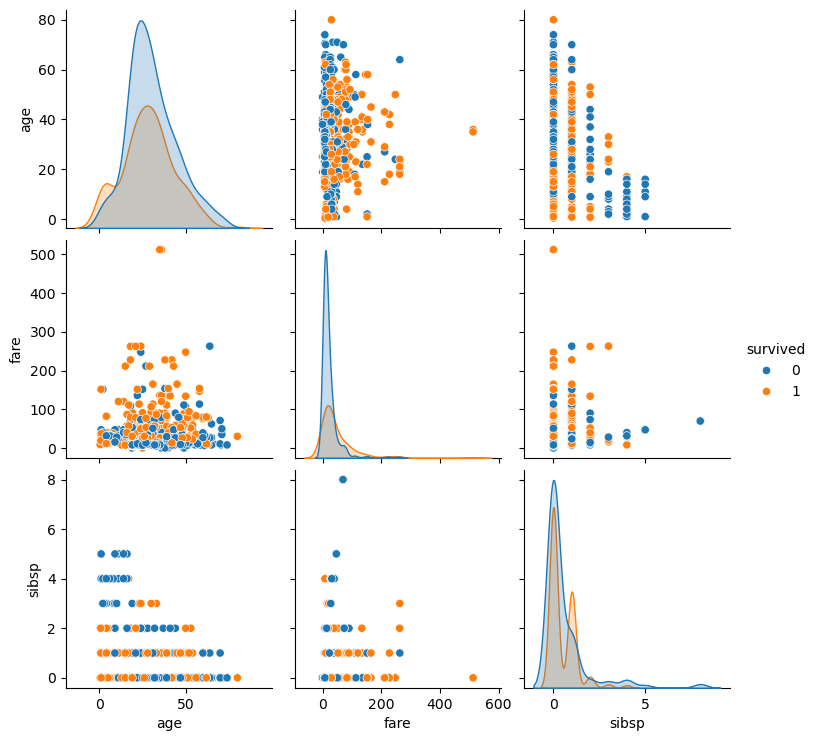

In [146]:
# plt.figure(figsize=(14,4))

# plt.subplot(1,2,1)
# sns.countplot(x='sex', hue = 'survived', data = df_clean)
# plt.title('Survived by sex')

# plt.subplot(1,2,2)
# sns.countplot(x='fare', hue='survived', data=df_clean)

sns.pairplot(df_clean, vars=['age', 'fare', 'sibsp'],
hue='survived', diag_kind='kde')
plt.show()

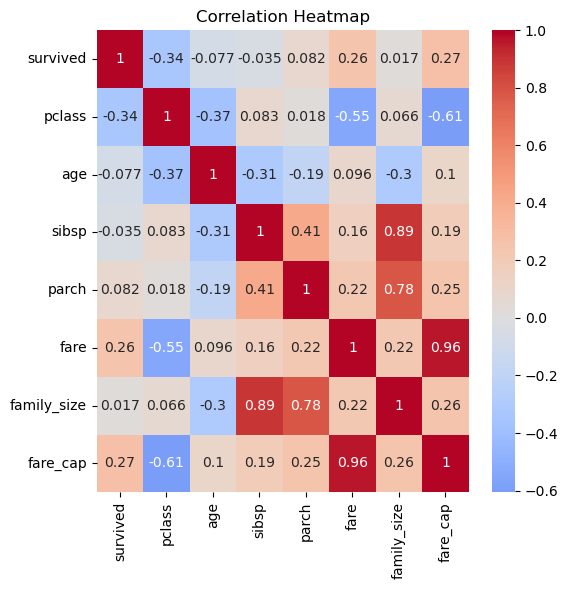

In [144]:
plt.figure(figsize=(6, 6))
numeric_cols = df_clean.select_dtypes(include=np.number).columns
sns.heatmap(df_clean[numeric_cols].corr(), annot=True, cmap='coolwarm',center=0)
plt.title('Correlation Heatmap')
plt.show()

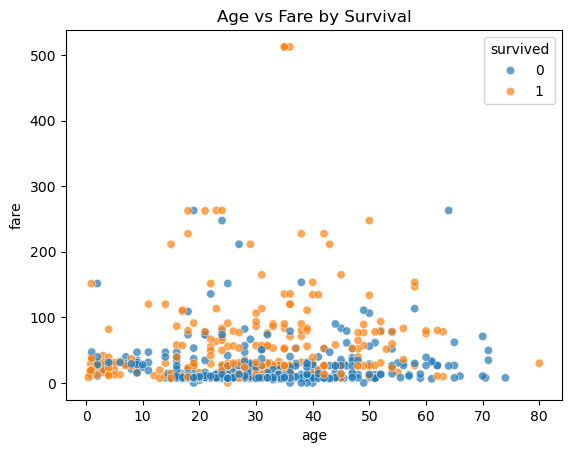

In [139]:
sns.scatterplot(x='age', y='fare', hue='survived',
alpha=0.7, data=df_clean)
plt.title('Age vs Fare by Survival')
plt.show()

Text(0.5, 1.0, 'Age Distribution')

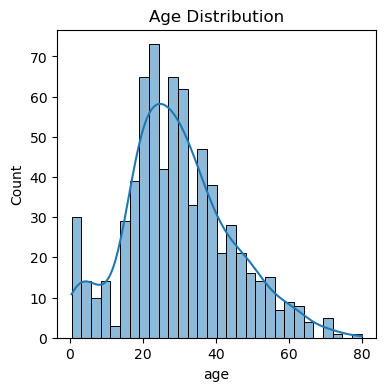

In [150]:
plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 2)
sns.histplot(df_clean['age'], kde=True, bins=30)
plt.title('Age Distribution')

# 1.1.2 Data Types and Categories

In [22]:
categorical_cols = ['sex', 'embarked', 'class', 'who', 'adult_male', 'alone']
for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    category
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    category
dtypes: category(6), float64(2), int64(4), object(2)
memory usage: 61.7+ KB


In [24]:
df_clean.drop_duplicates(inplace=True)

In [25]:
df_clean.drop(columns=['alive', 'pclass', 'embark_town'], inplace=True, errors='ignore')

In [26]:
df_clean.head()

,survived,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,male,35.0,0,0,8.0500,S,Third,man,True,True


# 1.1.4 Outlier Detection

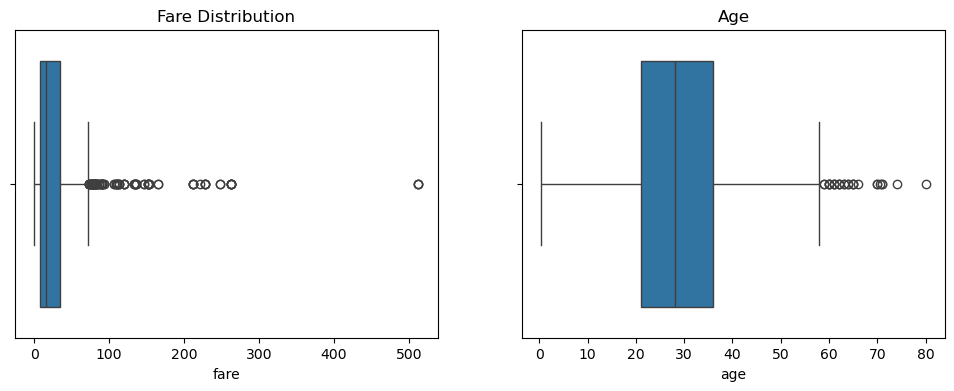

In [27]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['fare'])
plt.title("Fare Distribution")
plt.subplot(1,2,2)
sns.boxplot(x=df_clean['age'])
plt.title("Age")
plt.show()

In [28]:
Q1 = df_clean['fare'].quantile(0.25)
Q3 = df_clean['fare'].quantile(0.75)
IQR = Q3-Q1
upper_bound = IQR*1.5+Q3
print(f"Fares above {upper_bound:.2f} are potential outliers.")
df_clean['fare_capped'] = df_clean['fare'].clip(upper=upper_bound)

Fares above 73.42 are potential outliers.
